# Author: Alexander Goudemond, Student Number: 219030365

This Jupyter Notebook aims at exploring the data-sets for the project, and finding ways to represent the data in an easy way

# Data-Set File Heirarchy

This section of the notebook focusses on understanding the file heirarchy of the data-sets

Let us start with some imports:

In [1]:
from os import getcwd, walk, mkdir, stat, remove
from os import sep # used later on to print directory contents
from os.path import exists, basename, join

from shutil import move # moves and replaces files

import matplotlib.pyplot as plt
import cv2

In [2]:
print(getcwd())

c:\Users\G5\Documents\GitHub\COMP700


The file path used by author should be: "C:\Users\G5\UKZN\COMP700"

In [3]:
desired_directory = "..\\..\\Comp700_DataSets"
current_directory = getcwd()

print( exists(current_directory + "\\" + desired_directory) )

True


The output should be true as the file path we are interested in is:

```
Documents
|_______Comp700_DataSets
|_______Github
        |_______Comp700
```

There are many files inside this folder, so let us get the first 2 'branches' to show the user

In [4]:
path = walk(current_directory + "\\" + desired_directory)

count = 0
for root, dirs, files in path:
    print(dirs)
    print("Length is:", len(dirs), "\n")
    if (count == 1):
        break
        
    count += 1

['Extracted', 'OriginalZipped']
Length is: 2 

['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']
Length is: 20 



I.e. :

```
Documents
|_______Comp700_DataSets
        |_______Extracted
                |_______BF-C2DL-HSC
                |_______BF-C2DL-HSC (1)
                |_______ ...
                
        |_______OriginalZipped
                |_______BF-C2DL-HSC.zip
                |_______BF-C2DL-HSC (1).zip
                |_______ ...
|_______Github
|_______ ...
```

The walk() function does not show zipped files, but that is what is contained in the directory called _OriginalZipped_

A detailed breakdown of all directories can be shown with following function, adapted from stack overflow:

In [5]:
# from os import sep

# Author: dhobbs on Mar 15, 2012 at 21:29, https:\\\\stackoverflow.com\\questions\\9727673\\list-directory-tree-structure-in-python
def list_files(startpath):
    for root, dirs, files in walk(startpath):
        level = root.replace(startpath, '').count(sep)
        indent = ' ' * 4 * (level)
        print('{}{}\\'.format(indent, basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            # 3 lines of code added to improve readibility
            if (".tif" in f):
                print('{}{}'.format(subindent, "..."))
                break
            print('{}{}'.format(subindent, f))

path = (current_directory + "\\" + desired_directory)

list_files(path)

Comp700_DataSets\
    Extracted\
        BF-C2DL-HSC\
            BF-C2DL-HSC\
                01\
                    ...
                01_GT\
                    SEG\
                        ...
                    TRA\
                        man_track.txt
                        ...
                01_ST\
                    SEG\
                        ...
                02\
                    ...
                02_GT\
                    SEG\
                        ...
                    TRA\
                        man_track.txt
                        ...
                02_ST\
                    SEG\
                        ...
        BF-C2DL-HSC (1)\
            BF-C2DL-HSC (1)\
                01\
                    ...
                02\
                    ...
        BF-C2DL-MuSC\
            BF-C2DL-MuSC\
                01\
                    ...
                01_GT\
                    SEG\
                        ...
                    TRA\
            

The ellipses above indicate that images are contained in that location.

In order to view every folder's collection of images, we need to travel individually into each folder and look at the images contained there.

Before we go any further, it is important to acknowledge the structure of the directories. 

There are 20 data-sets contained here. Every folder that has the suffix _(1)_ represents the CHALLENGE data-set, provided by the Cell Tracking Challenge.

Inside the TRAINING data-sets, additional folders appear, either as shown on the left OR as shown on the right:

```
    01                                            01
    01_GT                                         01_GT
    01_ST                                         02
    02                                            02_GT
    02_GT                                         
    02_ST                                         
```

If the folder contains the suffix "\_GT" of "\_ST", then the image contents have the naming convention "man\_segXXXX.tif" or "man\_trackXXXX.tif", otherwise the  images have the naming convention "tXXXX.tif", where XXXX represents the number of the image in that folder

The author suspects that "man\_seg" represents a manually segmented cell, whereas "man\_track" represents a manually tracked cell. The other files are the "Petri Dish" files, showing the complete landscape of the cells under the microscope

Now, windows photo viewer (and the extension in VS Code) show the "man\_" images as pure black images.... This is not helpful or useful

# Image recognition

In the section below, the notebook will explore ways to extract the valuable information from these seemingly black images

Opencv creates the same phenomenon:

In [6]:
sample_directory = "DataSetExploration\\SampleImages"

path = walk(current_directory + "\\" + sample_directory)

i = 1
for root, dirs, files in path:
    print(files)
    
    for item in files:
        location = (current_directory + "\\" + sample_directory + "\\" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        (x, y) = img.shape
        break

imgSmall = cv2.resize(img, (x // 2, y // 2))
cv2.imshow(item, imgSmall)
cv2.waitKey(0)

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


-1

However, If we use Matplotlib to view a sample of each of the TIF images, we see the following:

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


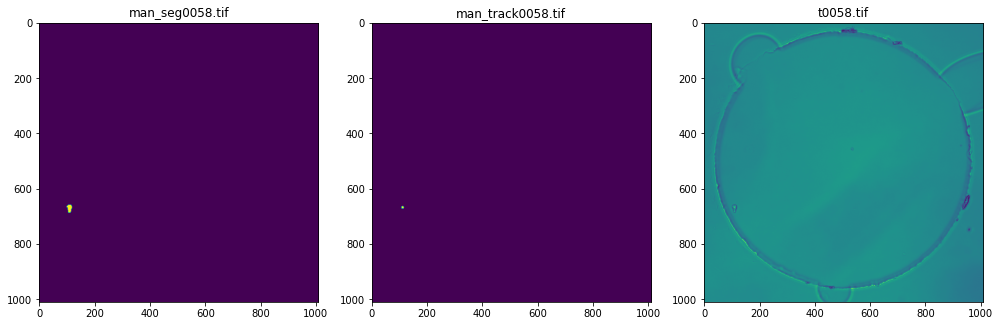

In [7]:
sample_directory = "DataSetExploration\\SampleImages"

path = walk(current_directory + "\\" + sample_directory)

i = 1
for root, dirs, files in path:
    print(files)
    fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "\\" + sample_directory + "\\" + item)
        img = plt.imread(location)
        
        fig.add_subplot(1, 3, i)
        plt.title(item)
        plt.imshow(img)
        i += 1

plt.tight_layout()
plt.show()


Here is the same, as grayscale:

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


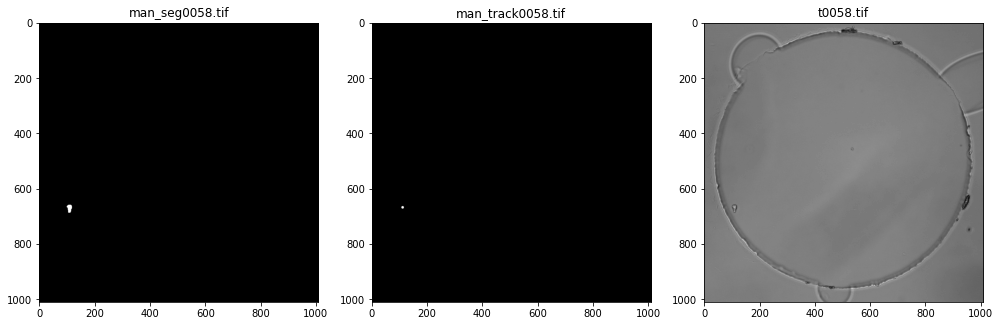

In [8]:
sample_directory = "DataSetExploration\\SampleImages"

path = walk(current_directory + "\\" + sample_directory)

i = 1
for root, dirs, files in path:
    print(files)
    fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "\\" + sample_directory + "\\" + item)
        img = plt.imread(location)
        
        fig.add_subplot(1, 3, i)
        plt.title(item)
        plt.imshow(img, cmap="gray")
        i += 1

plt.tight_layout()
plt.show()


As we can see from the pop-up window - the details in the Opencv window are not being shown... They ARE being shown in the Matplotlib.Pyplot package.

This is not desirable, as Opencv has some useful tools we'd like to use for data visualization. So we need to find a way to get the features shown from Matplotlib, and preserve them for future use with Opencv

Let us see if we can mix and match:

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


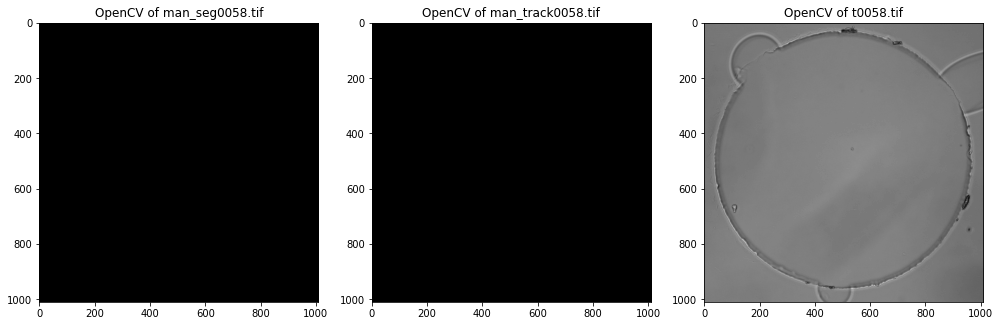

In [9]:
path = walk(current_directory + "\\" + sample_directory)

i = 1
for root, dirs, files in path:
    print(files)
    fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "\\" + sample_directory + "\\" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        
        fig.add_subplot(1, 3, i)
        plt.title("OpenCV of " + item)
        plt.imshow(img, cmap="gray")
        i += 1

plt.tight_layout()
plt.show()

NO! We cannot mix and match. What about saving a file using Matplotlib and then opening it using Opencv?

In [10]:
path = walk(current_directory + "\\" + sample_directory)
destination_directory = "DataSetExploration\\MatplotlibSavedImages"
try:
    mkdir(destination_directory)
except FileExistsError:
    pass
except:
    print("Unknown Error Encountered...")

# i = 1
for root, dirs, files in path:
    print(files)
    # fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "\\" + sample_directory + "\\" + item)
        img = plt.imread(location)
        name = destination_directory + "\\" + "Matplotlib_" + item[ : -4] + ".jpg"
        plt.imsave(name, img, cmap="gray")
        
path = walk(current_directory + "\\" + destination_directory)

for root, dirs, files in path:
    print(files)
    for item in files:
        location = (current_directory + "\\" + destination_directory + "\\" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        (x, y) = img.shape
        break

imgSmall = cv2.resize(img, (x // 2, y // 2))
cv2.imshow(item, imgSmall)
cv2.waitKey(0)

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']
['Matplotlib_man_seg0058.jpg', 'Matplotlib_man_track0058.jpg', 'Matplotlib_t0058.jpg']


-1

YES! We can do that. So that is one option for how we can address the inconsitent black images. However, this option changes the quality from TIFF to JPG...

Another option is to attempt to read the images in using matplotlib.pyplot and then write them using Opencv

Let us try to do that now:

In [11]:
path = walk(current_directory + "\\" + sample_directory)

destination_directory = "DataSetExploration\\OpencvSavedImages"
try:
    mkdir(destination_directory)
except FileExistsError:
    pass
except:
    print("Unknown Error Encountered...")

# i = 1
for root, dirs, files in path:
    print(files)
    # fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "\\" + sample_directory + "\\" + item)
        img = plt.imread(location)
        name = destination_directory + "\\" + "Opencv_" + item
        cv2.imwrite(name, img)

path = walk(current_directory + "\\" + destination_directory)

for root, dirs, files in path:
    print(files)
    for item in files:
        location = (current_directory + "\\" + destination_directory + "\\" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        (x, y) = img.shape
        break

imgSmall = cv2.resize(img, (x // 2, y // 2))
cv2.imshow(item, imgSmall)
cv2.waitKey(0)


['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']
['Opencv_man_seg0058.tif', 'Opencv_man_track0058.tif', 'Opencv_t0058.tif']


-1

Unfortunately, that does not work... So our best bet is to read them in and save them using Matplotlib. This is not ideal, as we may lose a bit of quality converting from TIF to JPG

We desire to read in the image using Matplotlib, and write it to disk as a grayscale TIF. Though this does not appear possible, as Matplotlib does not support TIFF extensions. Let's try create Grayscale TIFF's from the sample pictures?

In [12]:
path = walk(current_directory + "\\" + sample_directory)
destination_directory = "DataSetExploration\\GrayscaleTiffs"
try:
    mkdir(destination_directory)
except FileExistsError:
    pass
except:
    print("Unknown Error Encountered...")

# i = 1
for root, dirs, files in path:
    print(files)
    # fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "\\" + sample_directory + "\\" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        name = destination_directory + "\\" + "Grayscale_" + item
        cv2.imwrite(name, img)
    

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


Unfortunately, no difference! Looks like our best bet is to convert it to JPG when we need to... Let's move on

We can use a function to calculate the size of a file like this:

In [13]:
# from os import stat

bytes = stat("DataSetExploration\\GrayscaleTiffs\\Grayscale_man_seg0058.tif").st_size
print("File is", bytes / 1024, "kb's")

File is 19.185546875 kb's


If we compare the Sample Images file size to that of our other files, we recognize the following:

In [14]:
places_array = ["DataSetExploration\\SampleImages", "DataSetExploration\\GrayscaleTiffs", 
                "DataSetExploration\\MatplotlibSavedImages", "DataSetExploration\\OpencvSavedImages"]

spacing_length = len("DataSetExploration\\MatplotlibSavedImages") # used to improve readibility

for i in range(len(places_array)):
    location = current_directory + "\\" + places_array[i]
    path = walk(location)

    for root, dirs, files in path:  
        print(places_array[i], " " * ( spacing_length - len(places_array[i]) ), end="\t")

        for item in files:
            bytes = stat(location + "\\" + item).st_size
            bytes = bytes / 1024
            print( str(bytes)[ : 6], "kb's", end="\t") # keep first 5 sig figs (ignore fullstop)
        print()




DataSetExploration\SampleImages          	38.419 kb's	38.281 kb's	509.12 kb's	
DataSetExploration\GrayscaleTiffs        	19.185 kb's	19.185 kb's	414.22 kb's	
DataSetExploration\MatplotlibSavedImages 	16.892 kb's	16.738 kb's	42.908 kb's	
DataSetExploration\OpencvSavedImages     	38.277 kb's	38.201 kb's	414.22 kb's	


From the results above, we can see that the Grayscale TIFFs we created result in a loss of information for the manually segmented and tracked images, but only a small loss for the main image.

The file sizes for MatplotlibSavedImages follows a similar pattern, however the original Petri Dish image has a large loss in quality...

OpencvSavedImages should be virtually identical to the original pictures, as Opencv merely read them in and saved them, as is.

From the above, we can infer that a loss in quality in the manually segmented and tracked images is acceptable, however we would like to try preserve the data in the Petri dish image.

Before we conclude this, let us look at the Pillow package to identify if we can see the details in the manually segmented and tracked images

In [15]:
# Imports PIL module 
from PIL import Image

im = Image.open("DataSetExploration\\SampleImages\\man_seg0058.tif") 
im.show()

Unfortunately not... We have no choice but to convert each image into a grayscale image, in order to see the details for the manually segmented and tracked images. One option we have is to leave the Petri Dish images as Tiff, and convert the rest to JPG... that solution may be ideal as we preserve the most amount of information for our segmentation software.

# Data-Set Cell Variation

This section of the notebook focusses on sampling one Perti Dish image from each folder and placing them together, to see the different cells present

['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']

Starting matplotlib



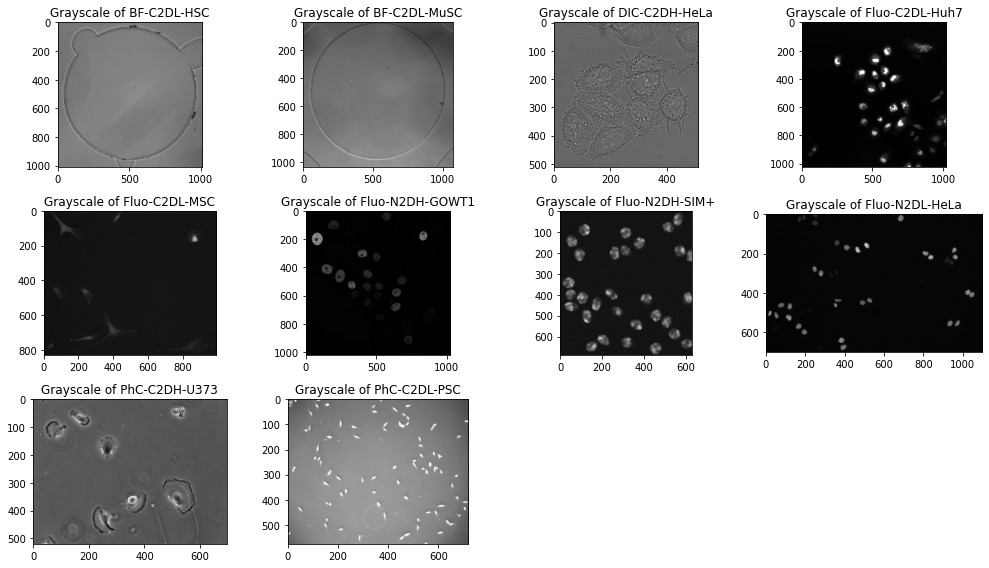

In [16]:
'''
We only need to show every _OTHER_ folder, as each data-set has a 
 training and challenge set. So out of 20 files, we need to show 10

First things first, let us create an array of the directory locations
'''

data_sets = "..\\..\\Comp700_DataSets"

path = walk(current_directory + "\\" + data_sets)

directory_array = [] # contains the main folders

i = 1
for root, dirs, files in path:
    if (i == 2):
        directory_array = dirs
        break
    
    i += 1

print(directory_array)

print("\nStarting matplotlib\n")

path = walk(current_directory + "\\" + data_sets) # reset path

fig = plt.figure(figsize=(14, 8))

i = -1
temp = -1
counter = 1 # used for matplotlib subplots
for root, dirs, files in path:
    # print(dirs)
    for item in files:
        # only execute for first picture in directory
        if ("t0000.tif" == item) or ("t000.tif" == item):
            i += 1

            # skips folder "02" in data-sets
            if (i % 2 == 1):
                break
                
            # print(i)
            temp = i // 2

            # skip Challenge data-sets
            if ("(1)" in directory_array[temp]):
                break

            location = ( current_directory + "\\" + data_sets + "\\Extracted\\" + directory_array[temp] + 
                        "\\" + directory_array[temp] + "\\01\\" + item)
            # print(location)

            img = plt.imread(location)
            
            fig.add_subplot(3, 4, counter)
            plt.title("Grayscale of " + directory_array[temp])
            plt.imshow(img, cmap="gray")

            counter += 1

            break

        else:
            break


plt.tight_layout()

# save file for future use
plt.savefig("DataSetExploration\\Visualization_Of_Cells.jpg")

plt.show()

# save file for future use
# plt.savefig("Visualization_Of_Cells.jpg")


Great! That is a nice visualization of each data-set. If we look at the website, we can confirm the dimensions of each microscope used:

| Data-Set Name   | Pixel Size (Microns) | Time Step (Min) |
|-----------------|----------------------|-----------------|
| BF-C2DL-HSC     | 0.645 X 0.645        | 5               |
| BF-C2DL-MuSC    | 0.645 X 0.645        | 5               |
| DIC-C2DH-HeLa   | 0.19 x 0.19          | 10              |
| Fluo-C2DL-MSC   | 0.3 x 0.3            | 20              |
| Fluo-N2DH-GOWT1 | 0.240 x 0.240        | 5               |
| Fluo-N2DL-HeLa  | 0.645 x 0.645        | 30              |
| PhC-C2DH-U373   | 0.65 x 0.65          | 15              |
| PhC-C2DL-PSC    | 1.6 x 1.6            | 10              |
| Fluo-N2DH-SIM+  | 0.125 x 0.125        | 29              |

# Data-Set Videos

This section of the notebook will generate videos for each of the data-sets

We desire to have a short video showing the movement of the cells over time, which we can refer to when we want to understand the features of the data.

We will need to use OpenCV to generate the videos, depending on the length of data present. For example, folders containing 1000 images may run for more time than those with 300 images.

Each video (for Training and Challenge) will be saved in a folder, outside of Github, for ease of reference. This is because the combined file size can be ~200MB, so it is same in the same directory as the Data-Set images

First, let us create an a few arrays for the information we need:

In [17]:
# a list of the directories - will be used to name the videos
print(directory_array)

['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']


In [18]:
# First, generate a list of the locations for each folder of Petri Dish images

path = walk(current_directory + "\\" + data_sets) # reset path

location_array = []

# used to cycle between 2 folders, present in each directory
sub_directory_choice = ["\\01\\", "\\02\\"]

i = 0 # will grow from 0 to 39
index = 0 # we need to lie in [0, 19]
for root, dirs, files in path:
    # print(dirs)
    for item in files:
        if ("t0000.tif" == item) or ("t000.tif" == item):
            index = i // 2

            location = ( current_directory + "\\" + data_sets + "\\Extracted\\" + directory_array[index] + 
                        "\\" + directory_array[index] + sub_directory_choice[i % 2])
            
            i += 1
            # print(location)
            location_array.append(location)

print(location_array)



['c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC (1)\\BF-C2DL-MuSC (1)\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC (1)\\BF-C2DL-MuSC (1)\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\

The cell below verifies that all cells have exactly 1 set of dimensions across the folder

In [19]:
# # Now, use the location_array to determine if each data-set has consistent image sizes

# path = walk(current_directory + "\\" + data_sets) # reset path

# temp_array = []

# i = -1 # will grow from 0 to 39
# for root, dirs, files in path:
#     # print(files)
#     for item in files:
#         if ("man_" not in item) and (".zip" not in item):
#             # update on first element only
#             if ("t0000.tif" == item) or ("t000.tif" == item):  
#                 i += 1
            
#             # print(location_array[i] + item, exists(location_array[i] + item))
#             # break

#             img = cv2.imread( (location_array[i] + item), cv2.IMREAD_GRAYSCALE)
#             (x, y) = img.shape

#             # only keep distinct sizes
#             if ([x, y] not in temp_array):
#                 temp_array.append([x, y])
            

#         # skip "man_" images
#         else:
#             break

#     if (len(temp_array) != 0):
#         print(temp_array, end="\t")

#     temp_array = []


From the test above, we can see that the images are already consistent in their dimensions, however the dimensions vary per data-set. We can use this knowledge to just find the dimensions of the first image in each folder, which will be used further on

In [20]:
image_size_array = []

path = walk(current_directory + "\\" + data_sets) # reset path

i = -1 # will grow from 0 to 39
for root, dirs, files in path:
    for item in files:
        if ("man_" not in item) and (".zip" not in item):
            # update on first element only
            if ("t0000.tif" == item) or ("t000.tif" == item):  
                i += 1

            img = cv2.imread( (location_array[i] + item), cv2.IMREAD_GRAYSCALE)
            (x, y) = img.shape

            image_size_array.append([x, y])
            break
            

        # skip "man_" images
        else:
            break

print(image_size_array)


[[1010, 1010], [1010, 1010], [1010, 1010], [1010, 1010], [1036, 1070], [1036, 1070], [1036, 1070], [1036, 1070], [512, 512], [512, 512], [512, 512], [512, 512], [1024, 1024], [1024, 1024], [1024, 1024], [1024, 1024], [832, 992], [782, 1200], [832, 992], [782, 1200], [1024, 1024], [1024, 1024], [1024, 1024], [1024, 1024], [690, 628], [773, 739], [718, 660], [790, 664], [700, 1100], [700, 1100], [700, 1100], [700, 1100], [520, 696], [520, 696], [520, 696], [520, 696], [576, 720], [576, 720], [576, 720], [576, 720]]


OKAY! We now have useful arrays we can use to generate our videos: location_array is used to find the position of the images, and image_size_array is used to find the dimensions of the folder. Next, we need to determine the quantity of pictures in each folder, as that will become our frame rate:

In [21]:
quantity_images_per_folder = []

path = walk(current_directory + "\\" + data_sets) # reset path

count = 0 
for root, dirs, files in path:
    for item in files:
        if ("man_" not in item) and (".zip" not in item):
            count += 1

        # skip "man_" images
        else:
            break
    # zero from previous cycle, thus item is empty
    if (count != 0):
        quantity_images_per_folder.append(count)
    count = 0 # reset

print(quantity_images_per_folder) 
        

[1764, 1764, 1763, 1763, 1375, 1376, 1376, 1375, 84, 84, 115, 115, 30, 30, 30, 30, 48, 48, 48, 48, 92, 92, 92, 92, 65, 150, 110, 138, 92, 92, 92, 92, 115, 115, 115, 115, 300, 300, 300, 300]


Before going any further, recall that OpenCV is unable to show the details on a black screen when reading the image in as Colour:

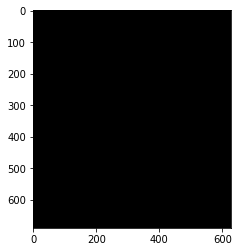

In [22]:
path = walk(current_directory + "\\DataSetExploration\\SimulatedSamples")

img = cv2.imread( current_directory + "\\DataSetExploration\\SimulatedSamples\\t000.tif" )
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

If we read in the data and plot it via plt we see the following:

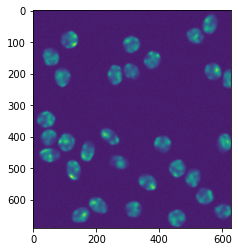

In [23]:
path = walk(current_directory + "\\DataSetExploration\\SimulatedSamples")

img = plt.imread( current_directory + "\\DataSetExploration\\SimulatedSamples\\t000.tif" )
plt.imshow(img)

So the colour scheme is off... Let us try fix that:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


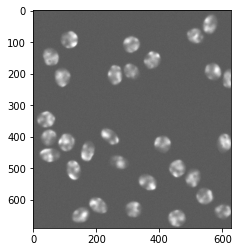

In [24]:
path = walk(current_directory + "\\DataSetExploration\\SimulatedSamples")

img = plt.imread( current_directory + "\\DataSetExploration\\SimulatedSamples\\t000.tif" )
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

That seems to fix it! Let's try use that with the simulated folder of images

Upon closer experimentation, using the quantity of images in a directory as a frame rate results in a video that is super duper short in length! Instead, the author used a frame rate of 10, in order to more clearly see the journey of the cells.

Below is the code to generate the 40 videos showing the data. It may take 15 minutes to run

In [25]:
# only progress if files don't exist
desired_folder = "..\\..\\Comp700_VideosOfDataSets_Colour"
makeVideos = False

if (exists(current_directory + "\\" + desired_folder)):
    # Now, go to directory and verify all is there
    path = walk(current_directory + "\\" + desired_folder)

    count = 0
    for root, dirs, files in path:
        for item in files:
            count += 1

    if (count == 40):
        print("All Videos exist already!")
    else:
        print("Not all Videos exist")
        makeVideos = True
    
if (makeVideos):
    path = walk(current_directory + "\\" + data_sets) # reset path

    sub_directory_choice = ["01", "02"]

    i = -1
    output_video = cv2.VideoWriter()
    frames_per_second = 10
    petri_dish_images = False

    # Generates Colour Videos
    for root, dirs, files in path:
        for item in files:
            if ("man_" not in item) and (".zip" not in item):
                # update on first element only
                if ("t0000.tif" == item) or ("t000.tif" == item):  
                    petri_dish_images = True
                    i += 1
                    index = i // 2 # used for output video as 2 copies for each directory

                    size = (image_size_array[i][1], image_size_array[i][0] ) # notice order
                    fileName = "Color_" + directory_array[index] + "_" + sub_directory_choice[i % 2] + ".mp4"
                    
                    output_video = cv2.VideoWriter(
                        fileName, 
                        cv2.VideoWriter_fourcc(*'DIVX'), 
                        frames_per_second, 
                        size
                    )
                
                # JUST in case...
                # if (not exists(location_array[i] + item)):
                #     print("HAIBO!", location_array[i] + item)

                # used to update the pictures for the Simulated Videos  
                if ("+" in directory_array[index]):
                    img = plt.imread( location_array[i] + item )
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                else:
                    # Colour Video
                    img = cv2.imread( (location_array[i] + item) )
                    
                output_video.write(img)

            else:
                petri_dish_images = False
                break
                

        if (petri_dish_images):     
            cv2.destroyAllWindows()
            output_video.release()
            print("Video finished for ", fileName, sep="")
            petri_dish_images = False # update incase next iteration containes empty array

All Videos exist already!


ouput_video.release() saves the contents of the files into the current directory, so the next block of code moves them to our a seperate folder

In [26]:
# from os.path import join
# from shutil import move # moves and replaces files

# only progress if files don't exist
desired_folder = "..\\..\\Comp700_VideosOfDataSets_Colour"
if (exists(current_directory + "\\" + desired_folder)):
    print("Videos already exist!")
else:
    try:
        mkdir(desired_folder)
    except FileExistsError:
        pass
    except:
        print("Unknown Error Encountered...")

    path = walk(current_directory)

    # count = 0
    for root, dirs, files in path:
        for item in files:
            if (".mp4" in item):
                # count += 1
                origin_path = current_directory
                new_destination = current_directory + "\\" + desired_folder
                move(join(current_directory, item), join(new_destination, item)) # should overwrite existing data

    # Now, go to directory and verify all is there
    path = walk(current_directory + "\\" + desired_folder)

    count = 0
    for root, dirs, files in path:
        for item in files:
            count += 1

    if (count == 40):
        print("All Videos Moved Successfully!")
    else:
        print("Not all Videos Moves Successfully")

Videos already exist!


The simulated videos have a bit of noise. This probably comes from the Conversion between plt and cv2. To try rememdy this in the future, let us explore if we can create grayscale videos:

Here is the same cell block as above, but generates Grayscale Videos

In [27]:
# only progress if files don't exist
desired_folder = "..\\..\\Comp700_VideosOfDataSets_Grayscale"
makeVideos = False

if (exists(current_directory + "\\" + desired_folder)):
    # Now, go to directory and verify all is there
    path = walk(current_directory + "\\" + desired_folder)

    count = 0
    for root, dirs, files in path:
        for item in files:
            count += 1

    if (count == 40):
        print("All Videos already exist!")
    else:
        print("Not all Videos exist")
        makeVideos = True

if (makeVideos):
    path = walk(current_directory + "\\" + data_sets) # reset path

    sub_directory_choice = ["01", "02"]

    i = -1
    output_video = cv2.VideoWriter() # needed for compiler to process loop below, updated inside loop
    frames_per_second = 10
    petri_dish_images = False

    # Grayscale Videos
    for root, dirs, files in path:
        for item in files:
            if ("man_" not in item) and (".zip" not in item):
                # update on first element only
                if ("t0000.tif" == item) or ("t000.tif" == item):  
                    petri_dish_images = True
                    i += 1
                    index = i // 2 # used for output video as 2 copies for each directory

                    size = (image_size_array[i][1], image_size_array[i][0] ) # notice order
                    fileName = "Grayscale_" + directory_array[index] + "_" + sub_directory_choice[i % 2] + ".mp4"
                    
                    # isColor below is what we use to create grayscale videos!
                    output_video = cv2.VideoWriter(
                        fileName, 
                        cv2.VideoWriter_fourcc(*'DIVX'), 
                        frames_per_second, 
                        size, 
                        isColor=False
                    )
                
                #!TODO handle simulated files in grayscale
                # JUST in case...
                # if (not exists(location_array[i] + item)):
                #     print("HAIBO!", location_array[i] + item)

                # used to update the pictures for the Simulated Videos  
                # write to disk as grayscale, then read in again
                if ("+" in directory_array[index]):
                    img = plt.imread( location_array[i] + item ) # grayscale
                    plt.imsave("temp.jpg", img)
                    img = cv2.imread( "temp.jpg", cv2.IMREAD_GRAYSCALE)

                else:
                    img = cv2.imread( (location_array[i] + item), cv2.IMREAD_GRAYSCALE)
                    
                output_video.write(img)

            else:
                petri_dish_images = False
                break
                

        if (petri_dish_images):     
            cv2.destroyAllWindows()
            output_video.release()
            print("Video finished for ", fileName, sep="")
            petri_dish_images = False # update incase next iteration containes empty array

All Videos already exist!


Now, let us move to a grayscale video folder:

In [28]:
# from os.path import join
# from shutil import move # moves and replaces files

# only progress if files don't exist
desired_folder = "..\\..\\Comp700_VideosOfDataSets_Grayscale"
if (exists(current_directory + "\\" + desired_folder)):
    print("Videos already exist!")
else:

    try:
        mkdir(desired_folder)
    except FileExistsError:
        pass
    except:
        print("Unknown Error Encountered...")

    path = walk(current_directory)

    # count = 0
    for root, dirs, files in path:
        for item in files:
            if (".mp4" in item):
                # count += 1
                origin_path = current_directory
                new_destination = current_directory + "\\" + desired_folder
                move(join(current_directory, item), join(new_destination, item)) # should overwrite existing data

    # Now, go to directory and verify all is there
    path = walk(current_directory + "\\" + desired_folder)

    count = 0
    for root, dirs, files in path:
        for item in files:
            count += 1

    if (count == 40):
        print("All Videos Moved Successfully!")
    else:
        print("Not all Videos Moves Successfully")

Videos already exist!


Now, remove the final temporary picture

In [29]:
# from os import remove
if (exists("temp.jpg")):
    remove("temp.jpg")

The grayscale videos successfully generate and the noise present in the simulated videos goes away! Fantastic! We may need to incorporate these findings later on

# Conclusions

This section of the notebook summarises the findings so far

The Data-Set has 2 folders, one contains the original zipped data, and the other the extracted data.

The extracted data is broken up into 2 sets: Training Data, and Challenge Data. The Challenge Data is indicated with a (1) in the folder name.

The distinction between the Training Data and the Challenge Data is that the Training Data contains additional folders of manual segmentation and manual tracking of the images. This will be useful later on when training the models.

To assist with understanding of the data, the author has created a Matplotlib plot showing 10 samples of the images from the 10 data sets (Training Data)

The author has also generated Videos of each folder, in both colour and grayscale, to show the movement of the cells over time.

Much later on, we will create these files in a similar way in order to show tracking and segmentation!

The most significant findings from the work is: The pictures may need to be read in via Matplotlib, and saved onto disk in order for OpenCV to register the information in the image. 

The author is not entirely sure why this is necessary, but it may be the case that the images are saved in a format that OpenCV struggles to process. Whatever the reason is though, one of the processing tips may be to do a bulk save of all images via Matplotlib first!

Thank You!